# Convex Conjugates

Conjugate function is one of the core concepts of convex analysis and optimization. In this notebook, I will explain the concept visually and numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

As a working example, consider a function $f(x) = (x - 1)^2 \cdot x \cdot (x + 1)$

In [2]:
my_func = np.vectorize(lambda x: (x - 1) ** 2 * x * (x + 1))

The function looks like below:

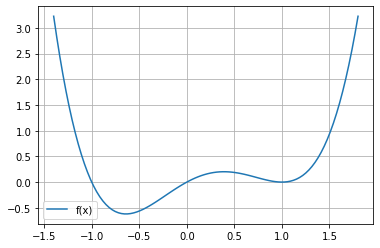

In [3]:
x = np.linspace(-1.4, 1.8, 100)
fig = plt.figure()
plt.plot(x, my_func(x), label="f(x)")
plt.grid()
plt.legend()

Suppose you are given a slope of a line, and let $y$ be that number. For example, suppose $y = 0.5$. There are many parallel lines with the same slope but different intercepts:

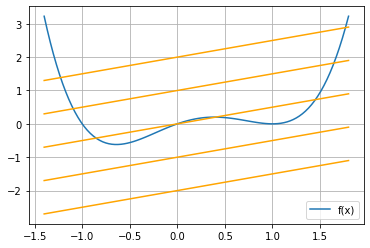

In [4]:
y = 0.5
plt.plot(x, my_func(x), label="f(x)")
plt.plot(x, y * x - 2, "orange")
plt.plot(x, y * x - 1, "orange")
plt.plot(x, y * x, "orange")
plt.plot(x, y * x + 1, "orange")
plt.plot(x, y * x + 2, "orange")
plt.legend()
plt.grid()

Suppose we are only interested in lines below the function.

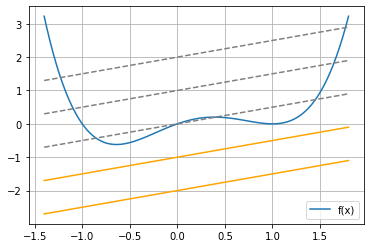

In [5]:
y = 0.5
plt.plot(x, my_func(x), label="f(x)")
plt.plot(x, y * x - 2, "orange")
plt.plot(x, y * x - 1, "orange")
plt.plot(x, y * x, "gray", linestyle="dashed")
plt.plot(x, y * x + 1, "gray", linestyle="dashed")
plt.plot(x, y * x + 2, "gray", linestyle="dashed")
plt.legend()
plt.grid()

If we introduce the parameter $b$ to represent each of these lines as $y \cdot x - b$, what condition do we need on $b$ to be sure the line is below $f(x)$ everywhere? For any $x$, we would need:

$$y \cdot x -  b \leq f(x).$$
 
In other words, $b \geq y \cdot x - f(x)$ for any $x$. Therefore, $b$ has to satisfy:

$$b \geq \sup_x \left( y \cdot x - f(x) \right).$$

And $b^* := \sup_x \left( y \cdot x - f(x) \right)$ would define the line $y \cdot x - b^*$, which is at the top of all such lines.
Let us find this value $b^*$ and plot that line:

smallest b: -0.5269030370084322


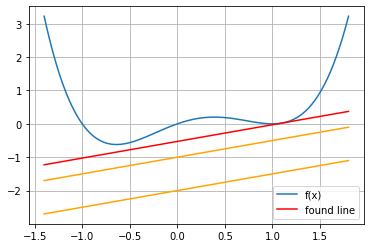

In [6]:
y = 0.5

# find b
gap_func = lambda x: -(y * x - my_func(x))
smallest_b = minimize(gap_func, x0=1.0).fun
print("smallest b:", smallest_b)

# plot it
plt.plot(x, my_func(x), label="f(x)")
plt.plot(x, y * x + smallest_b, "red", label="found line")
plt.plot(x, y * x - 2, "orange")
plt.plot(x, y * x - 1, "orange")
plt.legend()
plt.grid()

The value of $b^*$ was about -0.527, but of course it changes if $y$ changes. For example, had $y$ been 2, the value of $b^*$ would be:

smallest b: -2.3315704164440025


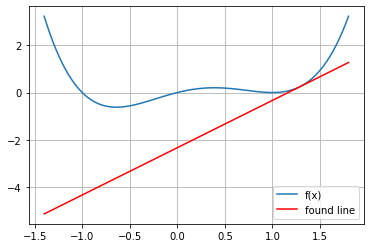

In [7]:
# redefine y
y = 2

# find b
gap_func = lambda x: -(y * x - my_func(x))
smallest_b = minimize(gap_func, x0=1.0).fun
print("smallest b:", smallest_b)

# plot it
plt.plot(x, my_func(x), label="f(x)")
plt.plot(x, y * x + smallest_b, "red", label="found line")
plt.legend()
plt.grid()

Since $b^*$ is dependent on $y$, let us rather write it as a funcion of $y$: 
$$f^*(y) = \sup_x \left( y \cdot x - f(x) \right).$$

This function $f^*(y)$ is called the _conjugate function_ of $f(x)$. Given a slope $y$, $f^*(y)$ finds the line that most tightly lower-bounds (i.e., minorizes) $f(x)$. These lines determined by $f^*(y)$ can be visualized as:

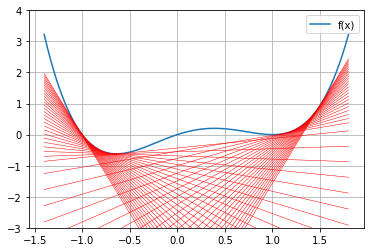

In [8]:
plt.plot(x, my_func(x), label="f(x)")

# try different values of y
ys = np.linspace(-5, 5, 50)
for y in ys:
    # find b
    gap_func = lambda x: -(y * x - my_func(x))
    # try two different initial guesses,
    # because sometimes minimize() returns a suboptimal solution
    smallest_b1 = minimize(gap_func, x0=-1, method='L-BFGS-B').fun
    smallest_b2 = minimize(gap_func, x0=1, method='L-BFGS-B').fun
    smallest_b = min(smallest_b1, smallest_b2)
    plt.plot(x, y * x + smallest_b, "red", linewidth=.5)
plt.ylim(-3, 4)
plt.legend()
plt.grid()

When $f(x)$ is convex, these lines determined by $f^*(y)$ compactly describe the original function $f(x)$.

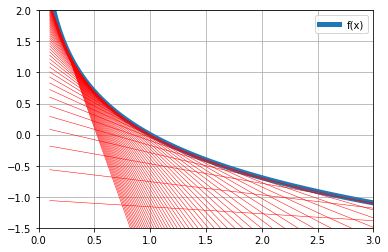

In [9]:
my_func = lambda x: -np.log(x)

x = np.linspace(0.1, 3, 100)
plt.plot(x, my_func(x), label="f(x)", linewidth=5)

# try different values of y
ys = np.linspace(-5, -0.01, 50)
for y in ys:
    # find b
    gap_func = lambda x: -(y * x - my_func(x))
    smallest_b = minimize(gap_func, x0=0.5, method='L-BFGS-B', bounds=((0.1, 5),)).fun
    plt.plot(x, y * x + smallest_b, "red", linewidth=.5)
plt.xlim(0, 3)
plt.ylim(-1.5, 2)
plt.legend()
plt.grid()

That is, $f(x)$ is the pointwise maximum of all lines defined by $f^*(y)$:

$$f(x) = \sup_y y \cdot x - f^*(y).$$

At this moment, recall that 

$$f^*(y) = \sup_x y \cdot x - f(x).$$

This implies that the conjugate of the conjugate is the original function: $f = f^{**}$. Of course, this is not a formal proof.